In [1]:
!pip install transformers datasets sentencepiece
!pip install transformers
!pip install transformers datasets
!pip install torchinfo
!pip uninstall accelerate transformers
!pip install accelerate transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.0 MB/s eta 0:00:00
Found existing installation: transformers 4.37.2
Uninstalling transformers-4.37.2:
  Would remove:
    /usr/local/bin/transformers-cli
    /usr/local/lib/python3.10/dist-packages/transformers-4.37.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/transformers/*
Proceed (Y/n)? y
y
y
  Successfully uninstalled transformers-4.37.2
y
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 70.6 MB/s eta 0:00:00
y
y


In [2]:
from datasets import load_dataset
data=load_dataset('kde4',lang1='en',lang2='fr')
data

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1454: FutureWarning: The repository for kde4 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/kde4
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/210173 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 210173
    })
})

In [3]:
data['train'][0].get('translation')

{'en': 'Lauri Watts', 'fr': 'Lauri Watts'}

In [4]:
data['train'][1].get('id')

'1'

In [5]:
data['train'][1].get('translation').get('fr')


'& Lauri. Watts. mail;'

In [6]:
data['train'][1].get('translation').get('en')

'& Lauri. Watts. mail;'

In [7]:
small=data['train'].shuffle(seed=42).select(range(1_000))
small

Dataset({
    features: ['id', 'translation'],
    num_rows: 1000
})

In [8]:
split=small.train_test_split(seed=42)
split

DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 750
    })
    test: Dataset({
        features: ['id', 'translation'],
        num_rows: 250
    })
})

In [9]:
split['train'][0]

{'id': '169005',
 'translation': {'en': '& Reduce Tree', 'fr': "& Refermer l' arborescence"}}

In [10]:
from transformers import AutoTokenizer
checkpoint='Helsinki-NLP/opus-mt-en-fr'
tokenizer=AutoTokenizer.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [11]:
en=split['train'][5]['translation']['en']
fr=split['train'][5]['translation']['fr']
en,fr

('You can either pick a file or enter its name in the Location: box.',
 'Vous pouvez soit choisir un fichier soit saisir son nom dans la zone de texte Emplacement.')

In [12]:
inputs=tokenizer(en)
inputs

{'input_ids': [213, 115, 1828, 8437, 15, 1437, 57, 3307, 96, 1129, 18, 4, 4577, 37, 5311, 3, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [13]:
with tokenizer.as_target_tokenizer():
  targets=tokenizer(fr)
targets

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3892: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


{'input_ids': [344, 1069, 345, 4094, 34, 2428, 345, 9315, 113, 689, 31, 8, 1283, 5, 1470, 21708, 3, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [15]:
tokenizer.convert_ids_to_tokens(target['input_ids'])

NameError: name 'target' is not defined

In [16]:
#wrong language
bad_targets=tokenizer(fr)
tokenizer.convert_ids_to_tokens(bad_targets['input_ids'])

['▁V',
 'ous',
 '▁po',
 'uv',
 'ez',
 '▁so',
 'it',
 '▁cho',
 'is',
 'ir',
 '▁un',
 '▁fi',
 'chi',
 'er',
 '▁so',
 'it',
 '▁s',
 'ais',
 'ir',
 '▁son',
 '▁no',
 'm',
 '▁dans',
 '▁la',
 '▁zone',
 '▁de',
 '▁text',
 'e',
 '▁Em',
 'placement',
 '.',
 '</s>']

(array([469., 131.,  40.,  28.,  10.,  15.,  15.,   5.,   5.,   4.,   0.,
          6.,   4.,   3.,   2.,   1.,   2.,   1.,   1.,   1.,   1.,   2.,
          0.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00000e+00, 2.67200e+01, 5.24400e+01, 7.81600e+01, 1.03880e+02,
        1.29600e+02, 1.55320e+02, 1.81040e+02, 2.06760e+02, 2.32480e+02,
        2.58200e+02, 2.83920e+02, 3.09640e+02, 3.35360e+02, 3.61080e+02,
        3.86800e+02, 4.12520e+02, 4.38240e+02, 4.63960e+02, 4.89680e+02,
        5.15400e+02, 5.41120e+02, 5.66840e+02, 5.92560e+02, 6.18280e+02,
        6.44000e+02, 6.69720e+02, 6.95440e+02, 7.21160e+02, 7.46880e+02,
        7.72600e+02, 7.98320e+02, 8.24040e+02, 8.49760e+02, 8.75480e+02,
        9.01200e+02, 9.26920e+02, 9.52640e+02, 9.78360e+02, 1.00408e+03,
        1.02980e+03, 1.05552e+03, 1.08124e+03, 1.10696e+03, 1.13268e+03,
 

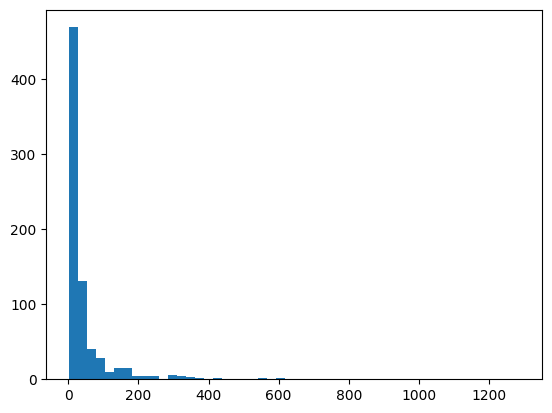

In [17]:
import matplotlib.pyplot as plt
train=split['train']['translation']
input_lens=[len(tr['en']) for tr in train]
plt.hist(input_lens,bins=50)

(array([491., 120.,  51.,  19.,  14.,  13.,   8.,   4.,   2.,   7.,   3.,
          4.,   4.,   3.,   0.,   2.,   1.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00000e+00, 4.20600e+01, 8.31200e+01, 1.24180e+02, 1.65240e+02,
        2.06300e+02, 2.47360e+02, 2.88420e+02, 3.29480e+02, 3.70540e+02,
        4.11600e+02, 4.52660e+02, 4.93720e+02, 5.34780e+02, 5.75840e+02,
        6.16900e+02, 6.57960e+02, 6.99020e+02, 7.40080e+02, 7.81140e+02,
        8.22200e+02, 8.63260e+02, 9.04320e+02, 9.45380e+02, 9.86440e+02,
        1.02750e+03, 1.06856e+03, 1.10962e+03, 1.15068e+03, 1.19174e+03,
        1.23280e+03, 1.27386e+03, 1.31492e+03, 1.35598e+03, 1.39704e+03,
        1.43810e+03, 1.47916e+03, 1.52022e+03, 1.56128e+03, 1.60234e+03,
        1.64340e+03, 1.68446e+03, 1.72552e+03, 1.76658e+03, 1.80764e+03,
 

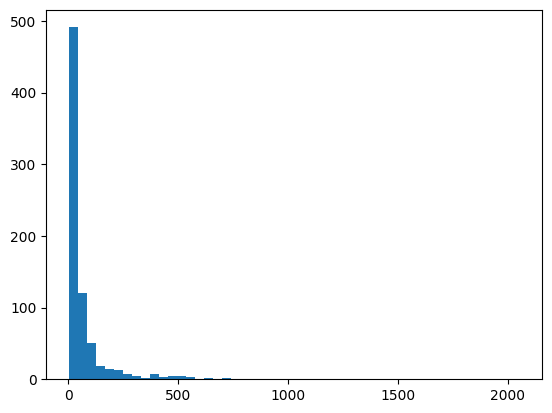

In [18]:
target_lens=[len(tr['fr']) for tr in train]
plt.hist(target_lens,bins=50)

In [19]:
max_input_len=128
max_target_len=128
def tokenizer_fn(batch):
  inputs=[x['en'] for x in batch['translation']]
  targets=[x['fr'] for x in batch['translation']]
  tokenized_inputs=tokenizer(inputs,max_length=max_input_len,truncation=True)

  with tokenizer.as_target_tokenizer():
    tokenized_targets=tokenizer(targets,max_length=max_target_len,truncation=True)

  tokenized_inputs['labels']=tokenized_targets['input_ids']
  return tokenized_inputs

In [20]:
tokenized_datasets=split.map(
    tokenizer_fn,
    batched=True,
    remove_columns=split['train'].column_names
)
tokenized_datasets


Map:   0%|          | 0/750 [00:00<?, ? examples/s]

Map:   0%|          | 0/250 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 750
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 250
    })
})

In [21]:
from transformers import AutoModelForSeq2SeqLM
model=AutoModelForSeq2SeqLM.from_pretrained(checkpoint)


pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [22]:
from transformers import DataCollatorForSeq2Seq
data_collator=DataCollatorForSeq2Seq(tokenizer,model=model)

In [23]:
[tokenized_datasets['train'][i] for i in range(1,3)]

[{'input_ids': [526, 3261, 0],
  'attention_mask': [1, 1, 1],
  'labels': [526, 3261, 0]},
 {'input_ids': [3492,
   3070,
   6443,
   37,
   443,
   61,
   32,
   317,
   2203,
   4824,
   514,
   1807,
   971,
   4,
   4124,
   3,
   0],
  'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  'labels': [34023,
   5,
   3948,
   5,
   372,
   402,
   38492,
   350,
   823,
   95,
   13439,
   2,
   25985,
   14,
   6,
   3996,
   3,
   0]}]

In [24]:

batch=data_collator([tokenized_datasets['train'][i] for i in range(1,3)])
batch.keys()

dict_keys(['input_ids', 'attention_mask', 'labels', 'decoder_input_ids'])

In [25]:
batch['labels']

tensor([[  526,  3261,     0,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
          -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100],
        [34023,     5,  3948,     5,   372,   402, 38492,   350,   823,    95,
         13439,     2, 25985,    14,     6,  3996,     3,     0]])

In [26]:
batch['decoder_input_ids']

tensor([[59513,   526,  3261,     0, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513],
        [59513, 34023,     5,  3948,     5,   372,   402, 38492,   350,   823,
            95, 13439,     2, 25985,    14,     6,  3996,     3]])

In [27]:
tokenizer.convert_ids_to_tokens(batch['decoder_input_ids'][0])

['<pad>',
 '▁K',
 'DE',
 '</s>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>']

In [28]:
split['train'][1]


{'id': '47571', 'translation': {'en': 'KDE', 'fr': 'KDE'}}

In [29]:
!pip install sacrebleu bert-score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 10.1 MB/s eta 0:00:00


In [36]:
from datasets import load_metric

bleu_metric = load_metric('sacrebleu', trust_remote_code=True)
bert_metric = load_metric('bertscore', trust_remote_code=True)


In [37]:
bleu_metric.compute(predictions=['I love cats'],references=[['I love cats']])

{'score': 0.0,
 'counts': [3, 2, 1, 0],
 'totals': [3, 2, 1, 0],
 'precisions': [100.0, 100.0, 100.0, 0.0],
 'bp': 1.0,
 'sys_len': 3,
 'ref_len': 3}

In [38]:
s='Martian is an efficient NMT framework written in C++'
bleu_metric.compute(predictions=[s],references=[[s]])

{'score': 100.00000000000004,
 'counts': [11, 10, 9, 8],
 'totals': [11, 10, 9, 8],
 'precisions': [100.0, 100.0, 100.0, 100.0],
 'bp': 1.0,
 'sys_len': 11,
 'ref_len': 11}

In [39]:
bert_metric.compute(
    predictions=['I love cats'],
    references=[['I like cats']],lang='en'
)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'precision': [0.9803369641304016],
 'recall': [0.9803369641304016],
 'f1': [0.9803369641304016],
 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.38.0)'}

In [44]:
import numpy as np
def compute_metrics(preds_and_labels):
  #preds are not logits but token ids
  preds,labels=preds_and_labels

  #convert predictions into words
  decoded_preds=tokenizer.batch_decode(preds,skip_special_tokens=True)

  #for any -100 label , replace with pad token id
  labels=np.where(labels!=-100,labels,tokenizer.pad_token_id)

  #convertl abels into words
  decoded_labels=tokenizer.batch_decode(labels,skip_special_tokens=True)

  #get rid of extra white space
  #and also put target into lists
  decoded_preds=[pred.strip() for pred in decoded_preds]
  decoded_labels=[[label.strip()] for label in decoded_labels]

  bleu=bleu_metric.compute(
      predictions=decoded_preds,references=decoded_labels
  )
  bert_score=bert_metric.compute(
       predictions=decoded_preds,references=decoded_labels,lang='fr'
  )
  return{
      'bleu':bleu['score'],
      'bert_score':np.mean(bert_score['f1'])
  }

In [45]:
from transformers import Seq2SeqTrainingArguments,Seq2SeqTrainer
training_args=Seq2SeqTrainingArguments(
    'finetuned-model',
    evaluation_strategy='no',
    save_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=64,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=5,
    predict_with_generate=True,
    fp16=True
)

In [46]:
trainer=Seq2SeqTrainer(
    model,
    training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)
trainer.train()


Step,Training Loss


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[59513]], 'forced_eos_token_id': 0}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[59513]], 'forced_eos_token_id': 0}
Checkpoint destination directory finetuned-model/checkpoint-72 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Some non-default gener

TrainOutput(global_step=120, training_loss=0.9562280654907227, metrics={'train_runtime': 58.6966, 'train_samples_per_second': 63.888, 'train_steps_per_second': 2.044, 'total_flos': 86056825651200.0, 'train_loss': 0.9562280654907227, 'epoch': 5.0})

In [48]:
trainer.save_model('my_saved_model')
from transformers import pipeline

translator = pipeline(
    'translation',
    model='my_saved_model',
    device=0
)
translated_text = translator('I hope you are a good boy')
print(translated_text)


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[59513]], 'forced_eos_token_id': 0}
/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


[{'translation_text': "J'espère que tu es un bon garçon."}]


In [49]:
translator('hello sir how are you')

[{'translation_text': 'Bonjour, monsieur. Comment allez-vous ?'}]